# **NUMBER SEQUENCE_LSTM_DENSE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
print(data)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [3]:
def splitSequence(seq, n_steps):
    
    #Declare X and y as empty list
    X = []
    y = []
    
    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps
        
        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break
            
        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        
        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)
    
    return X,y

n_steps = 7
X, y = splitSequence(data, n_steps)

print(X)

[[ 10  20  30  40  50  60  70]
 [ 20  30  40  50  60  70  80]
 [ 30  40  50  60  70  80  90]
 [ 40  50  60  70  80  90 100]
 [ 50  60  70  80  90 100 110]
 [ 60  70  80  90 100 110 120]
 [ 70  80  90 100 110 120 130]
 [ 80  90 100 110 120 130 140]
 [ 90 100 110 120 130 140 150]
 [100 110 120 130 140 150 160]
 [110 120 130 140 150 160 170]
 [120 130 140 150 160 170 180]
 [130 140 150 160 170 180 190]]


In [4]:
print(y)

[ 80  90 100 110 120 130 140 150 160 170 180 190 200]


In [5]:
# reshape from [samples, timesteps] into [samples, timesteps, features]

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X[:2])

[[[10]
  [20]
  [30]
  [40]
  [50]
  [60]
  [70]]

 [[20]
  [30]
  [40]
  [50]
  [60]
  [70]
  [80]]]


In [6]:
# Creating the model:

model = tf.keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Splitting the dataset into training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.MeanSquaredError())

# Training the model

print("Fit model on training data")

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test), verbose=1
)

Fit model on training data
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 17078.2695 - val_loss: 15226.3516
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 13504.3857 - val_loss: 13208.4287
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 11352.0488 - val_loss: 9225.9062
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 8051.9814 - val_loss: 5396.9604
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 5082.0312 - val_loss: 4169.0723
Epoch 6/100
1/1 [==============================] - 0s 36ms/step - loss: 3918.6831 - val_loss: 3692.0085
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 3462.0747 - val_loss: 3168.3047
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 3053.3110 - val_loss: 2640.1133
Epoch 9/100
1/1 [==============================] - 0s 33ms/step - loss: 2615.8171 - val_loss: 2158.5405
Epoch 10/100
1/1 [================

In [8]:
# Predicting on data:

test_data = np.array([90, 100, 110, 120, 130, 140, 150])
test_data = test_data.reshape((1, n_steps, n_features))
test_data

array([[[ 90],
        [100],
        [110],
        [120],
        [130],
        [140],
        [150]]])

In [9]:
predictNextNumber = model.predict(test_data, verbose=1)
print(predictNextNumber)

1/1 [==============================] - 0s 215ms/step
[[159.3239]]


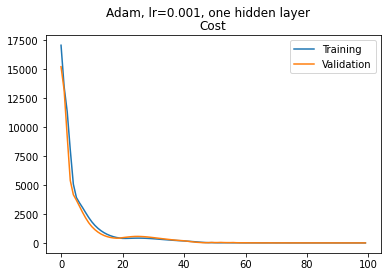

In [10]:
model.save("drive/MyDrive/Dataset/DataScience-Pianalytix-Models/NumberSequence.h5")

# Building graphs for the model:

fig = plt.figure()
fig.suptitle("Adam, lr=0.001, one hidden layer")

ax = fig.add_subplot(1,1, 1)
ax.set_title('Cost')
ax.plot(history.history['loss'], label='Training')
ax.plot(history.history['val_loss'], label='Validation')
ax.legend()

fig.show()